In [1]:
import cv2


In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model= 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels= []
file_name ='Label.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', '', '', 'plant', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'laptop', 'book', '', 'vase', 'Mobile Phone', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000004848FDB570>

# read an image


In [8]:
img = cv2.imread('mobi.jpg')

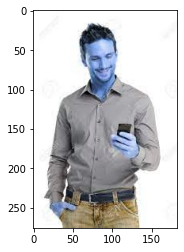

In [9]:
plt.imshow(img);

In [10]:
ClassIndex, confidence ,bbox = model.detect(img,confThreshold=0.5)

NameError: name 'img' is not defined

In [11]:
print(ClassIndex)

NameError: name 'ClassIndex' is not defined

In [12]:
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,color=(0,255,0), thickness=2)

NameError: name 'ClassIndex' is not defined

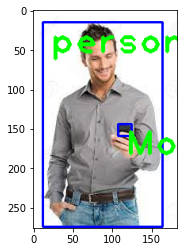

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video

In [9]:
cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open webcam')
    
font_scale=2
font= cv2.FONT_HERSHEY_COMPLEX_SMALL

while True:
    ret,frame=cap.read()
    
    ClassIndex, confidence, bbox= model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+6,boxes[1]+30),font,fontScale=font_scale,color=(0,255,0), thickness=1)
                
    cv2.imshow('Detection',frame)
    
    if cv2.waitKey(2) & 0xFF== ord('q'):
        break;

cap.release()
cv2.destroyAllWindows()

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[77]
 [ 1]]
()
[[77]]
[[77]]
[[77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
()
[[1]]
()
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [84]]
[[ 1]
 [84]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
()
()
()
()
()
[[84]]
[[84]
 [73]]
[[84]]
()
()
[[1]]
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[73]
 [ 1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[77]
 [ 1]]
[[1]]
[[1]]
()
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
()
[